## 평가 개요
# 사례연구 리스트 개요
- 강의명 : Python(파이썬), JAVA(자바)기반 AI활용 소프트웨어 개발 및 응용 과정
- 교과목명 : 텍스트 데이터 분석
- 평가주제 : 영화평 감성분석 분류 모델 만들기
- 평가일 : 2023년 01월 18일 수요일
- 수강생명 : 김승규


## 평가 1. 데이터 가져오기 (5점)
- 구글 코랩에서 데이터를 가져온 뒤, 총 몇개의 데이터가 존재하는지 확인한다. 
  + 행의 갯수
  + 열의 갯수

In [16]:
# 코드
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# 코드
import pandas as pd
rv_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/human/data/labeledTrainData.tsv',
                         header = 0, sep='\t', quoting=3)

rv_df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [18]:
# 코드
rv_df.shape

(25000, 3)

## 평가 2. 텍스트 데이터 전처리 (25점)
- 텍스트 데이터를 확인하면, `<br />`과 같은 html 태그가 존재한다. 이를 제거하는 코드를 작성한다. (부분점수 10점)

In [19]:
# 코드
import re

rv_df['review'] = rv_df['review'].str.replace('<br />', ' ')

- 파이썬의 정규표현식 모듈을 활용하여 영어 문자열이 아닌 모든 문자는 공백으로 변환하는 코드를 작성한다. 반드시 정규표현식으로 작성한다. (부분점수 15점)

In [20]:
# 코드
rv_df['review'] = rv_df['review'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))

## 평가 3. 워드 클라우드 작성 (10점)
- 주어진 텍스트를 활용하여 WordClound를 시각화 한다. 

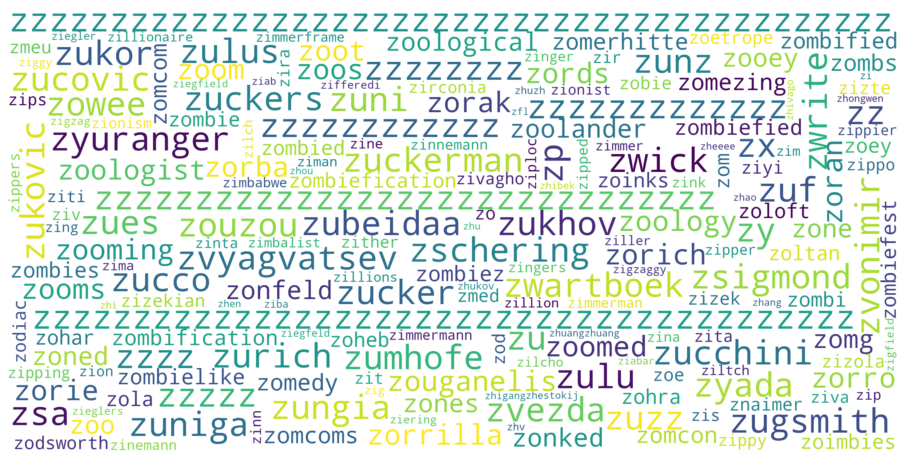

In [15]:
# 코드
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

rv_words = rv_df['review']
cnt_vect = CountVectorizer()
cnt_vect.fit(rv_words)
rv = cnt_vect.vocabulary_

stopwords = set(STOPWORDS)
rv_wc = WordCloud(stopwords = stopwords,
                    width = 3200,
                    height = 1600,
                    background_color = 'white').generate_from_frequencies(rv)


fig,ax = plt.subplots(figsize=(16, 10))
ax.imshow(rv_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 평가 4. 훈련데이터 및 테스트 데이터 분리 (10점)
- 머신러닝 코드 작성을 위한 데이터셋 분리 코드를 작성해본다. 

In [21]:
# 코드
from sklearn.model_selection import train_test_split

Y = rv_df['sentiment']
feature_X = rv_df['review']

X_train, X_test, y_train, y_test = train_test_split(feature_X, Y, test_size = 0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500,), (7500,), (17500,), (7500,))

## 평가 5. 주요 개념 이해, 서술형 (10점)
- 피처 벡터화를 진행할 때, 크게 2가지 방법을 활용합니다. 
- 두가지 방법이 무엇인지 간단한 예를 통해서 서술하세요. 

- 피처 벡터화에는 단순 카운트 기반의 벡터화와 TF-IDF 기반의 벡터화가 있다. 카운트 기반의 벡터화는 단어 피처에 값을 부여할 때, 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우를 카운트 벡터화라 하고, 카운트 값이 높을수록 중요한 단어로 인식한다. TF-IDF 기반의 벡터화는 카운트 기반의 벡터화의 문제라고 할 수 있는 빈도수 - 중요도 비례 문제를 보완하고자 도입되었다. 예를 들어 'KBO 올스타전' 이라는 주제인 기사들의 텍스트 분석을 한다고 했을 때 사실 'KBO'나 '올스타전'이라는 단어 자제에 빈도수는 높지만 중요도는 그렇게 높지 않다. 따라서 TF-IDF 기반의 벡터화는 이러한 문제를 보완하고자 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여해준다.

## 평가 6. 분류모형 만들기 - 1 (20점)
- CountVectorizer를 활용하여 모형을 생성한다. 
- Pipeline을 기반으로 자것ㅇ한다. 
- 머신러닝 모델은 LogisticRegression을 활용한다. 
- 모형 학습 후, 결괏값까지 확인하는 코드를 작성하고, 결괏값을 반드시 기재 한다. 미 기재시 감점(-5점 처리)
  + Accuracy Score:
  + ROC-AUC Score:

In [22]:
# 코드
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words = 'english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))
])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cnt_vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('lr_clf', LogisticRegression(C=10))])

## 평가 7. 분류모형 만들기 - 2 (20점)
- TfidfVectorizer 활용하여 모형을 생성한다. 
- Pipeline을 기반으로 자것ㅇ한다. 
- 머신러닝 모델은 LogisticRegression을 활용한다. 
- 모형 학습 후, 결괏값까지 확인하는 코드를 작성하고, 결괏값을 반드시 기재 한다. 미 기재시 감점(-5점 처리)
  + Accuracy Score:
  + ROC-AUC Score:

In [23]:
# 코드 
pred = pipeline.predict(X_test)
pred_probs = pipeline.predict_proba(X_test)[:, 1]

print("Accuracy Score : ", accuracy_score(y_test, pred))
print("ROC-AUC Score : ", roc_auc_score(y_test, pred_probs))

Accuracy Score :  0.8844
ROC-AUC Score :  0.9508386788102932
